## Gini Impurity
### Binary Features
- Ideally at leaf nodes, we minimize the gini impurity. We want the leafs to be more conculsive.
- Example: <img src="SpamURL.png">
- Here we have are using the data set to construct a decision tree, and we will also use the gini impurity
- The left node has a gini impurity of 0.44 ((2/3)(1-2/3) + (1/3)(1-1/3))
- The right node has a gini impurity of 0.375 ((3/4)(1-3/4) + (1/4)(1-1/4))
- The total gini will be calculated using a weighted average: 
- (3/7)(0.44) + (4/7)(0.375) = 0.403
- This is a good example when we only have two features. So it was easy to pick the root node. Next we will consider something that has more than one feature

### Continuous Features
- Here we will consider if an email is spam depending on the number of words there are in the email. (Continuous feature). 
- What we will do is sort the data. In this case we will split it based on the number of words in the email. And then we can calculate the average between each of the subsections.  
<img src="SpamWords.png">
- Now we can decided to create a decision tree based on these averages. So first we can try out 15.
- In that case we end up with an impurity value of 0.3 
<img src="SpamWords2.png">
- Remeber we want to maximize the purity of our data -> minimize the gini impurity value. In this case that value is 25. 

### MultiCategorical Features
- Here we are comparing the sender of the emails and checking if the email is spam.
- In this case, we will calculate the gini impurity for each of the potential splits and/or combinations: 
<img src="SpamSender.png">
- Now we will pick the combination which has the lowest impurity after this split

If our tree begins to get too complex, we can introduce hyper parameters which will help us prune our tree

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [11]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [22]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [23]:
df.at[336, "sex"] = "FEMALE"

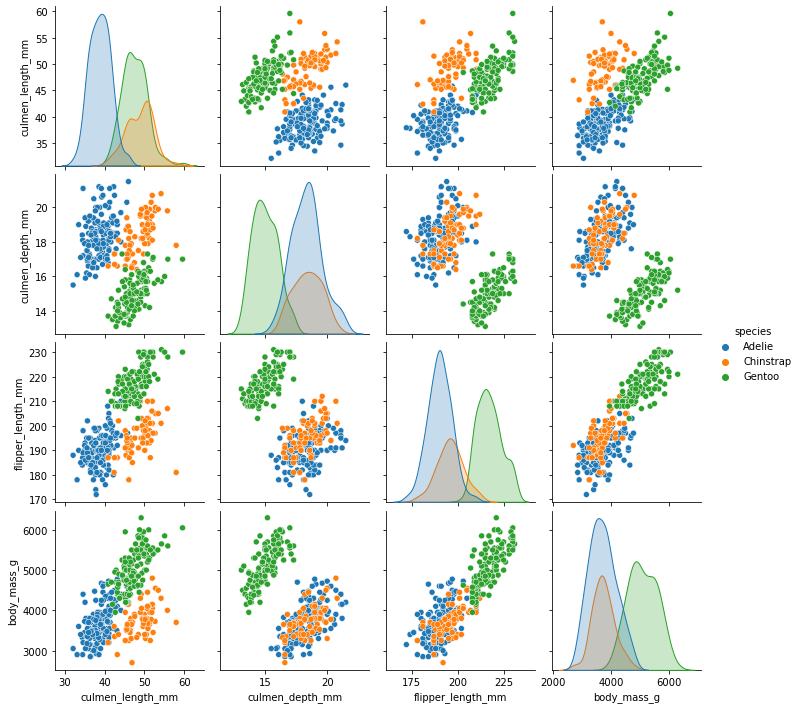

In [25]:
sns.pairplot(data=df, hue="species")

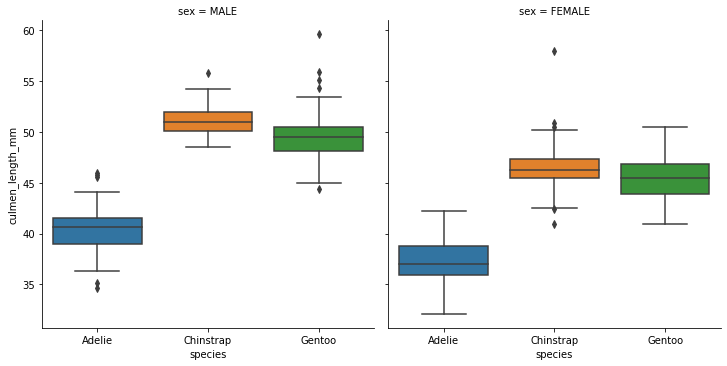

In [28]:
sns.catplot(data=df, x="species", y="culmen_length_mm", kind="box", col="sex")

In [30]:
df["island"]

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 334, dtype: object

In [41]:
X = pd.get_dummies(df.drop("species",axis=1), drop_first=True)
y = df["species"]
# WE do not need to scale since we are never using more than one feature at the same time

In [39]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model = DecisionTreeClassifier()

In [46]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
base_pred = model.predict(X_test)

In [49]:
base_pred

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adel

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [51]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



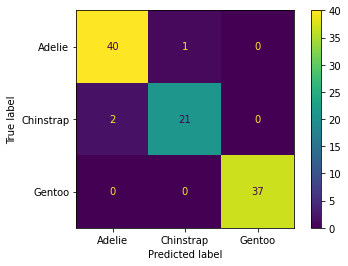

In [53]:
plot_confusion_matrix(model, X_test, y_test)

In [54]:
model.feature_importances_

array([0.33437342, 0.04203954, 0.53120101, 0.00239775, 0.07836008,
       0.        , 0.0116282 ])

In [59]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["importance"]).sort_values("importance")

,importance
island_Torgersen,0.000000
body_mass_g,0.002398
sex_MALE,0.011628
culmen_depth_mm,0.042040
island_Dream,0.078360
culmen_length_mm,0.334373
flipper_length_mm,0.531201


In [60]:
from sklearn.tree import plot_tree

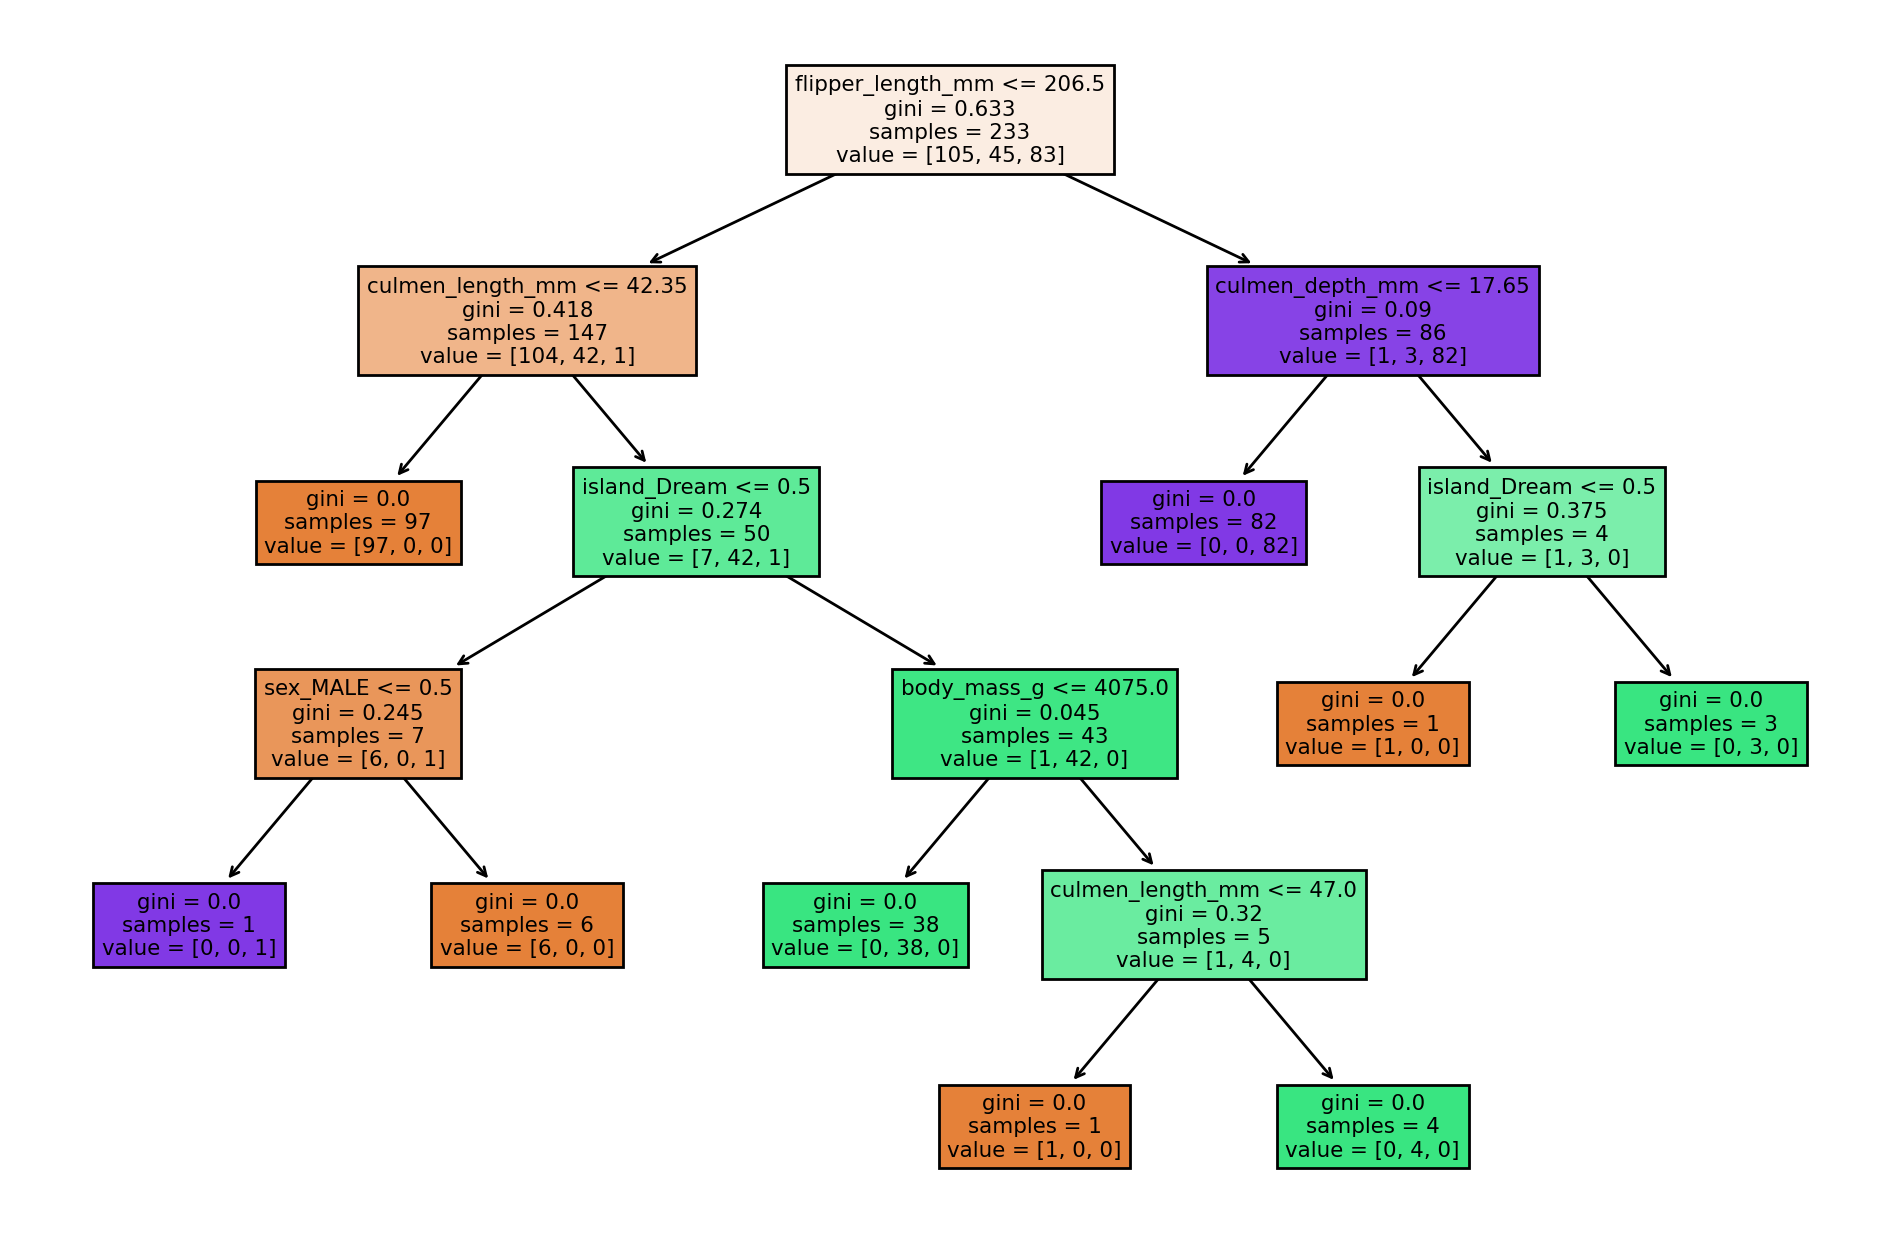

In [67]:
plt.figure(figsize=(12, 8), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True);

In [65]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [68]:
def reportModel(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds), "\n")
    plt.figure(figsize=(12, 8), dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True);

In [76]:
pruned_tree = DecisionTreeClassifier(max_depth=2)

In [77]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101
 



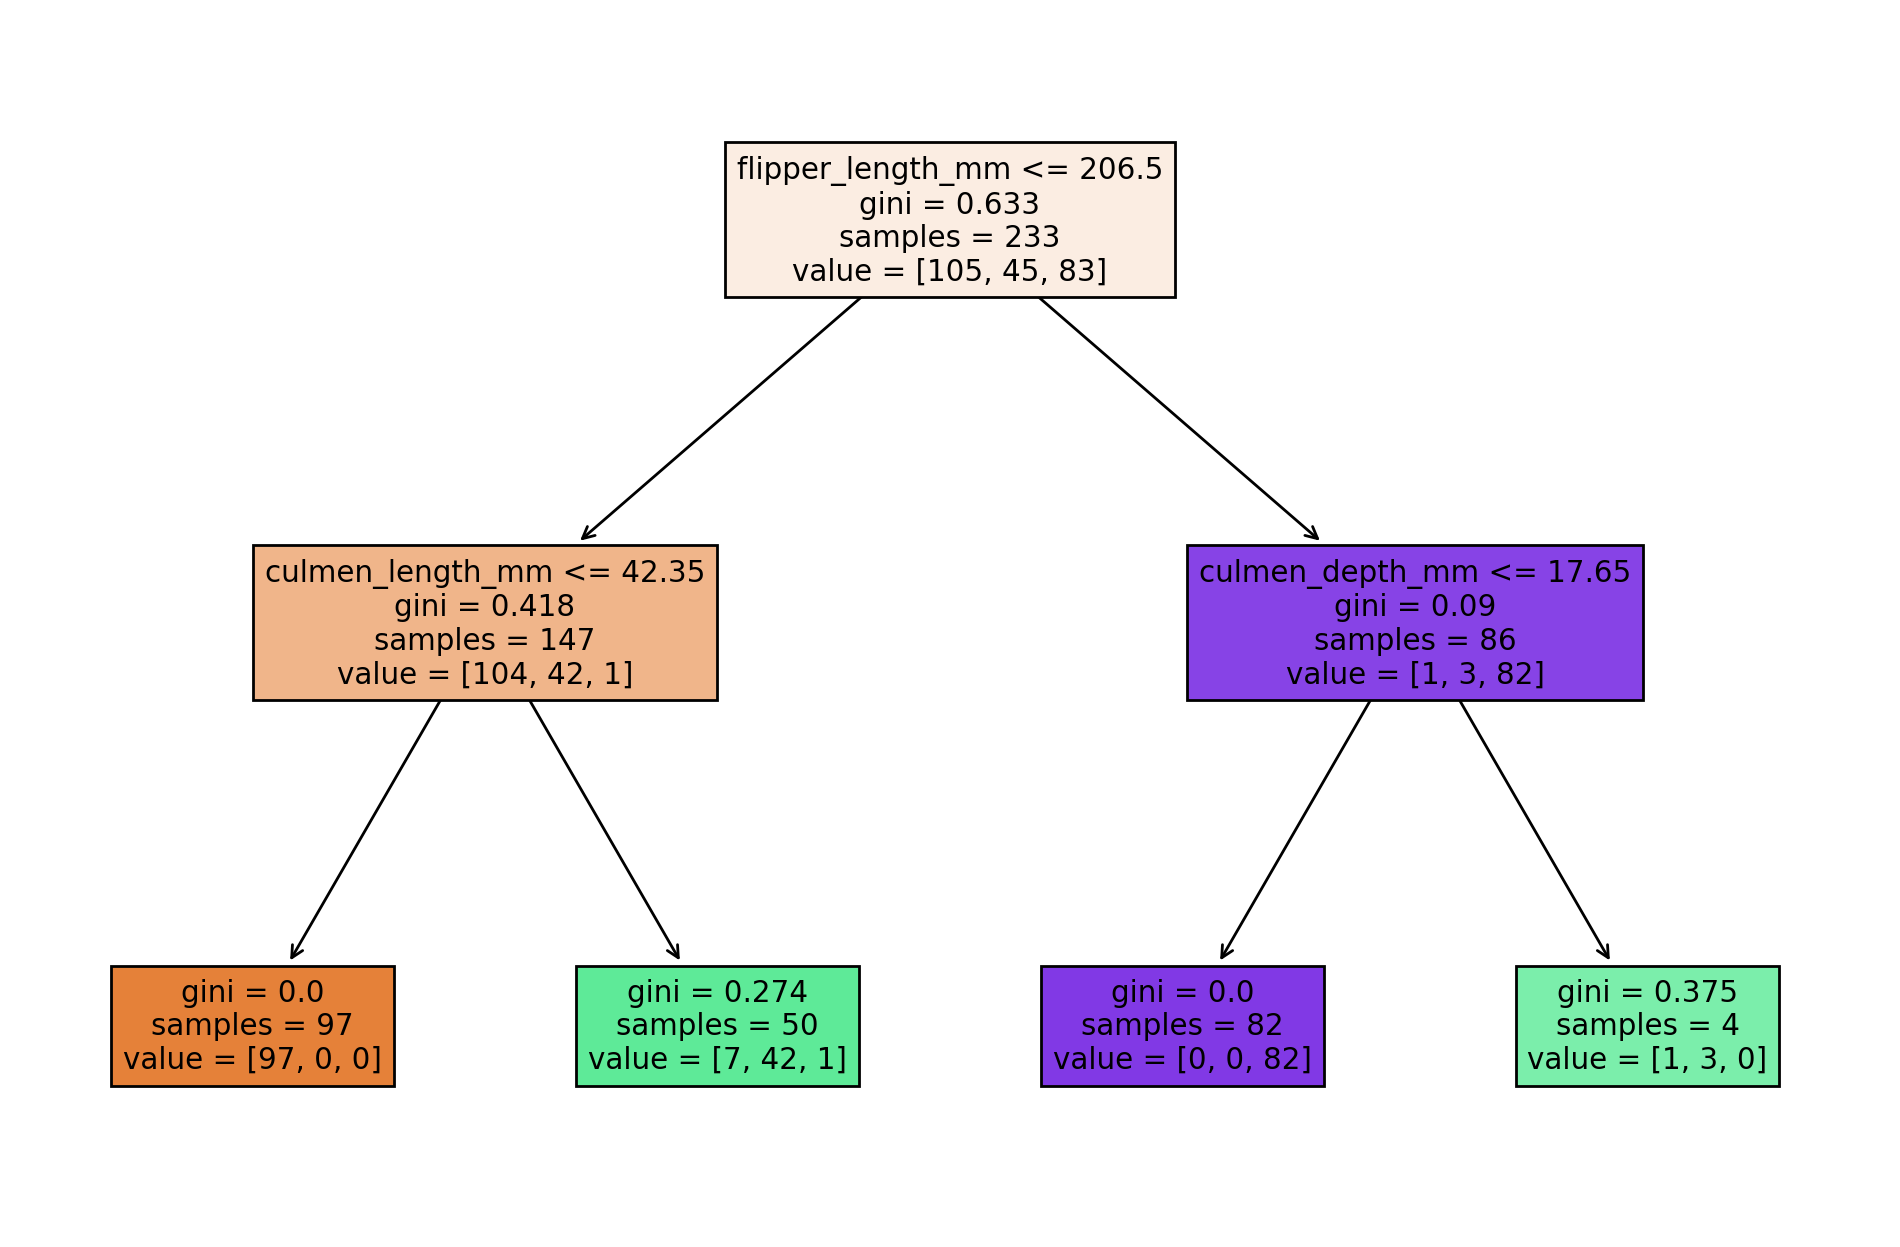

In [78]:
reportModel(pruned_tree)

In [79]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

In [81]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101
 



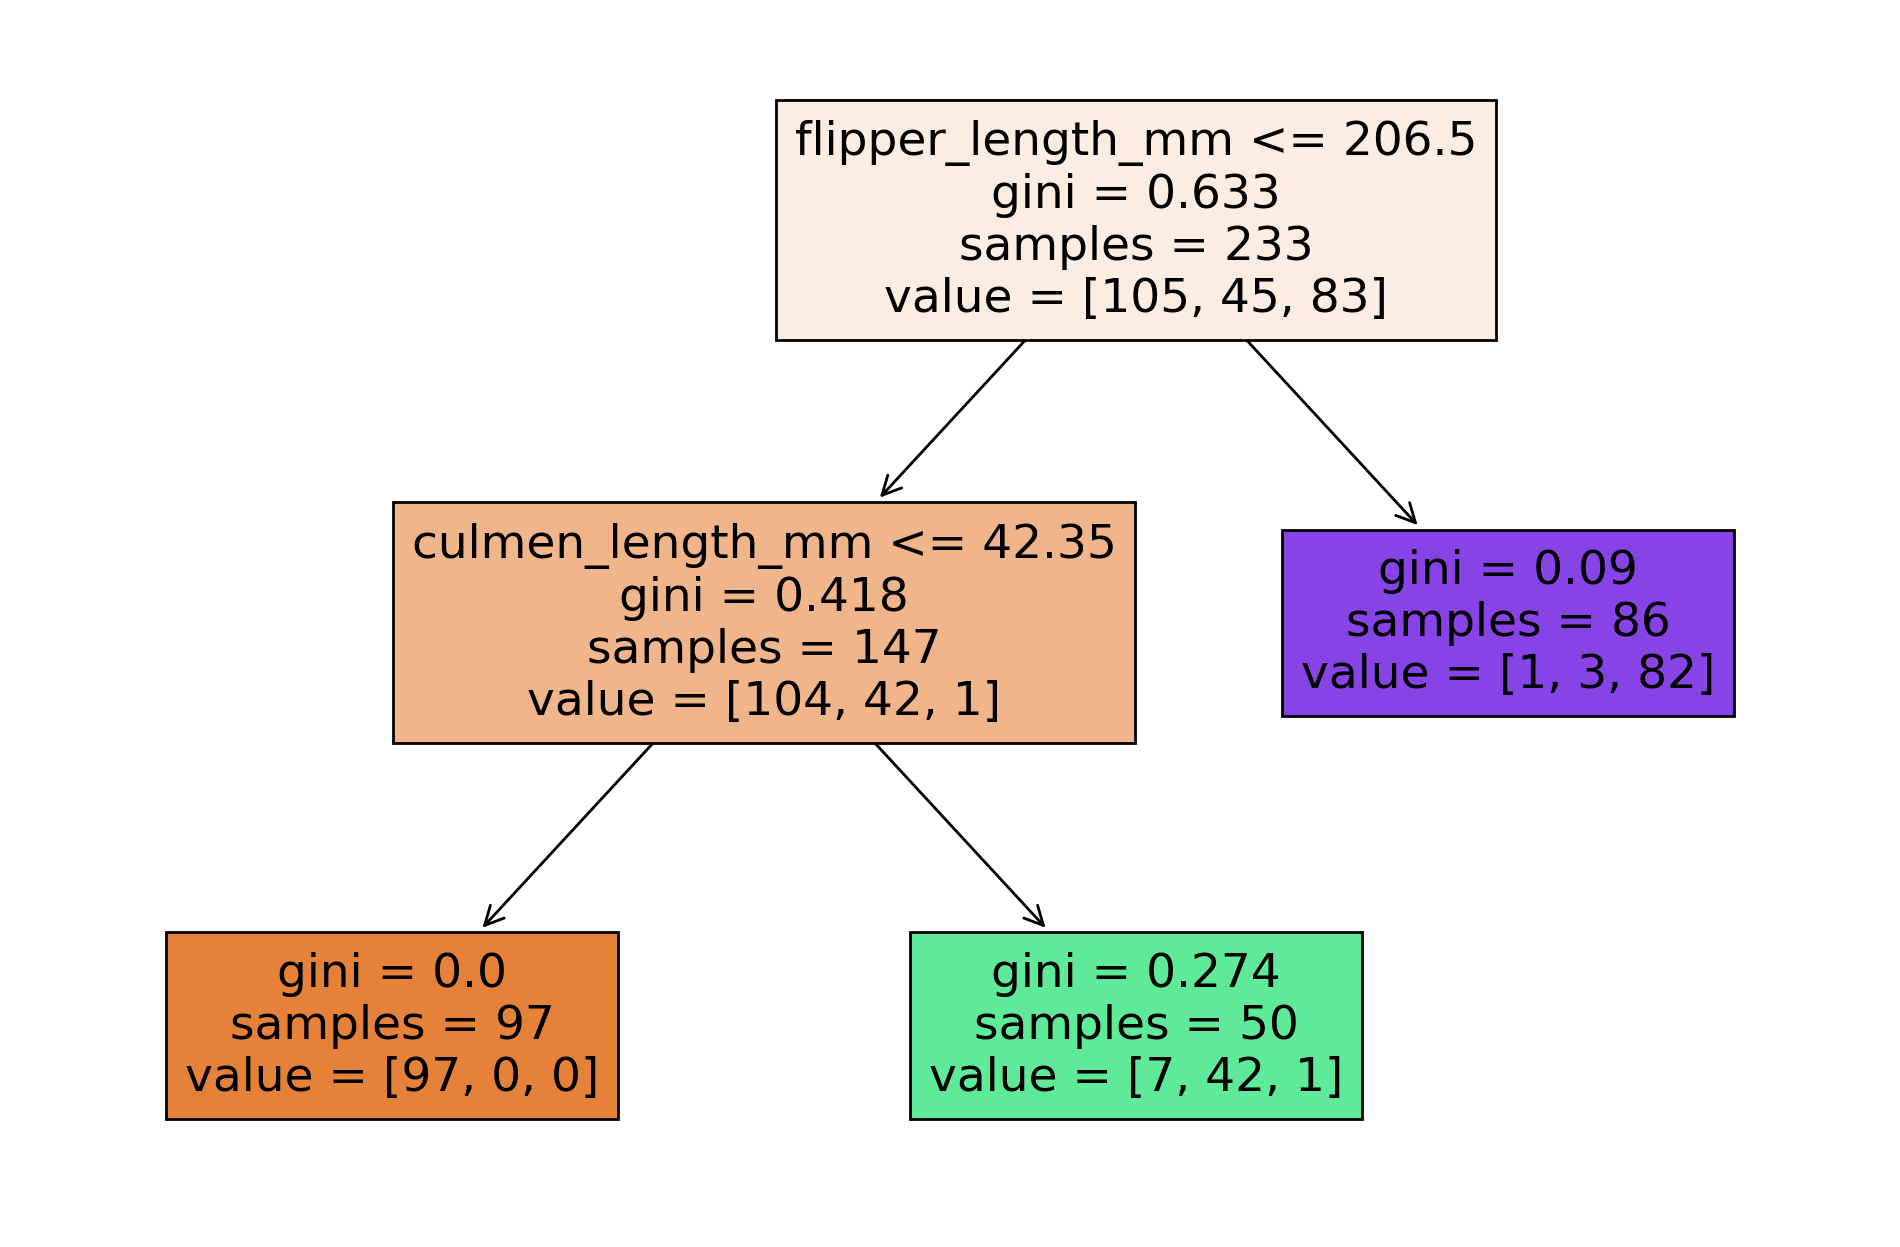

In [82]:
reportModel(max_leaf_tree)

In [83]:
entropy_tree = DecisionTreeClassifier(criterion="entropy")

In [84]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101
 



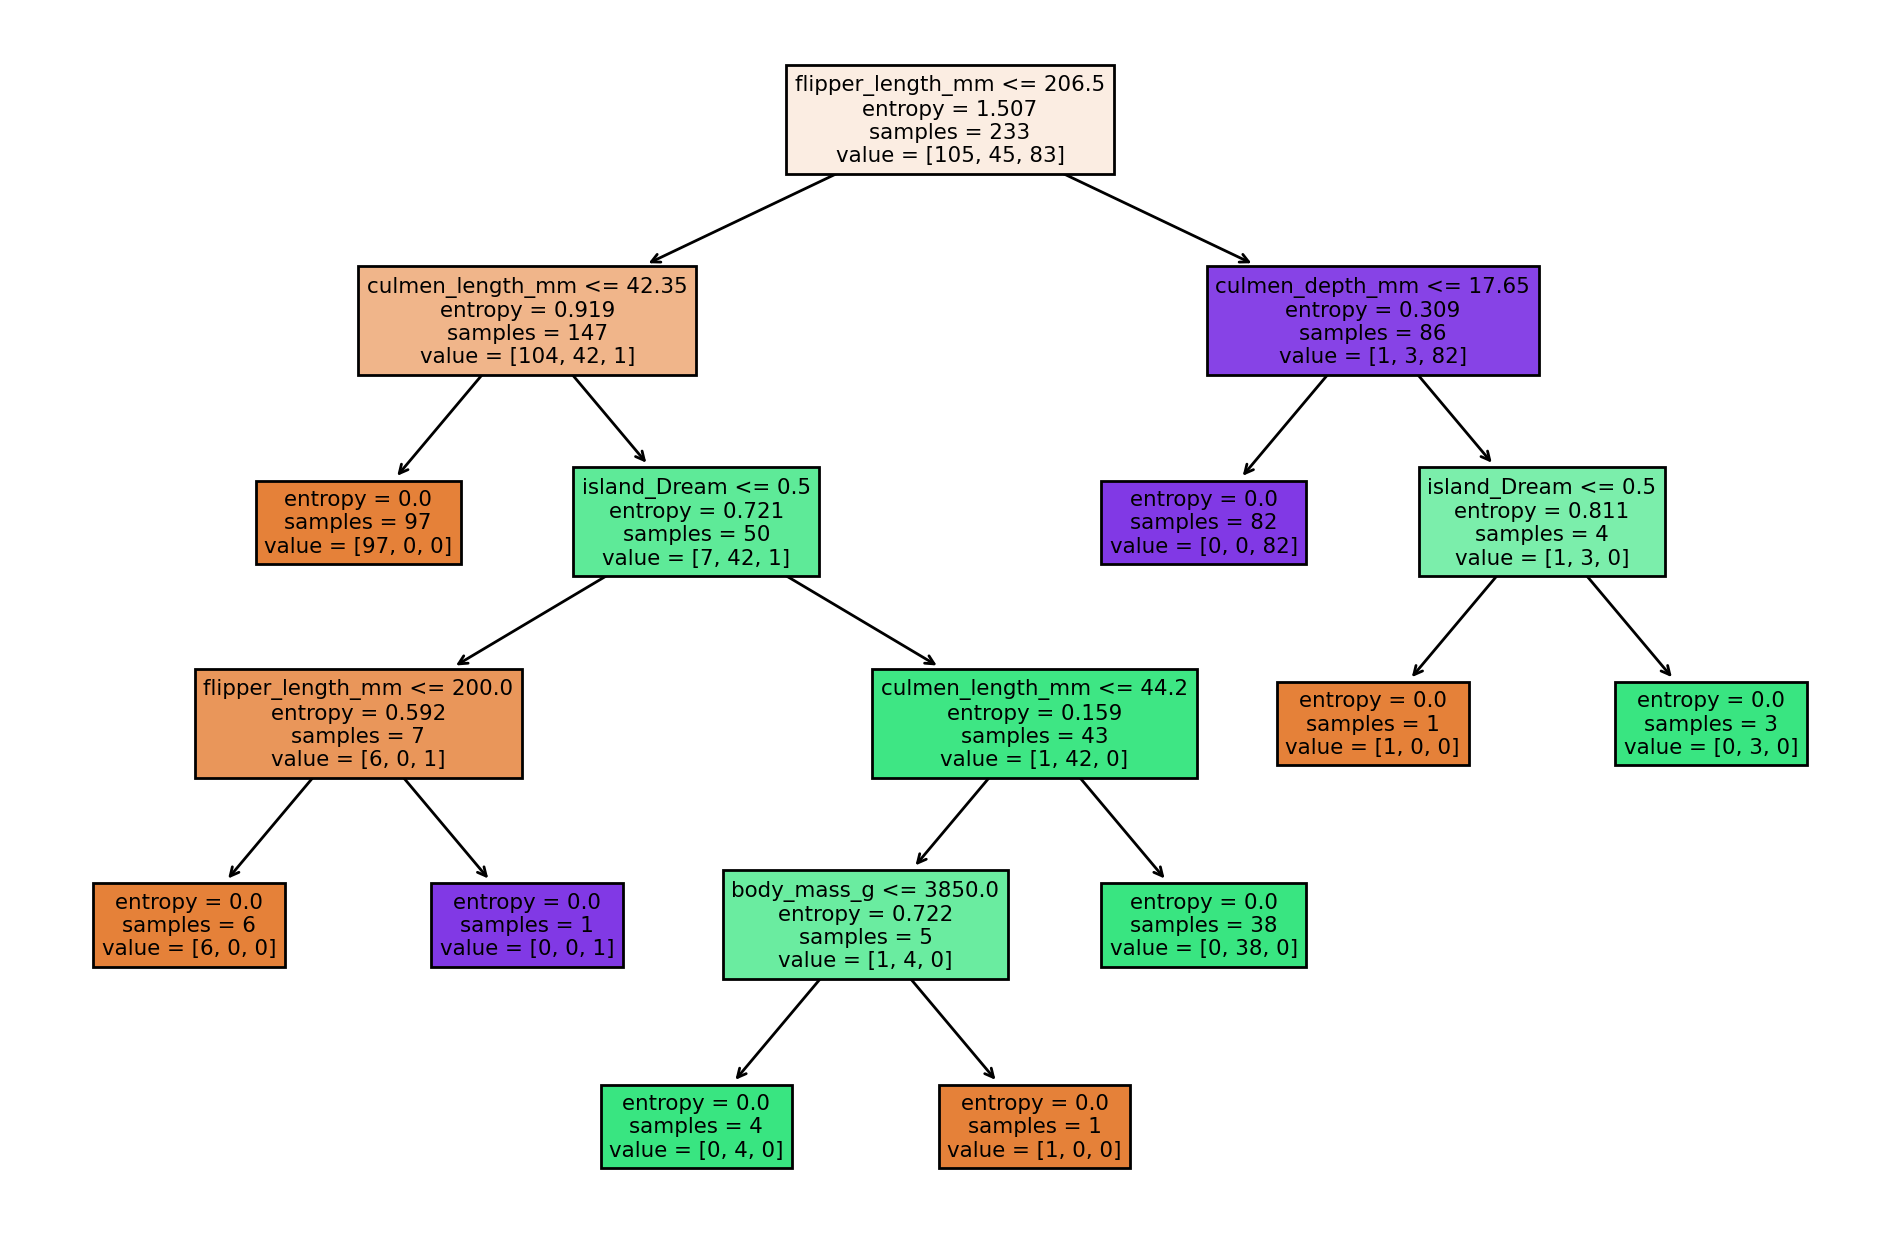

In [85]:
reportModel(entropy_tree)